# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pio.renderers.default = "png"

In [2]:
#Open the data frame

df = pd.read_csv('./Csv_Files/treated_df.csv')
df.Datetime = pd.to_datetime(df.Datetime)
df = df.set_index("Datetime")
df.head()

,Mild,SARS,Positive,UnderObs.,Recovered,Deaths,Masc.,Fem.
Datetime,,,,,,,,
2020-08-12,2921,206,791,386,382,23,363,428
2020-08-13,2966,208,814,401,390,23,378,436
2020-08-14,3023,210,835,422,390,23,390,436
2020-08-15,3030,210,841,428,390,23,393,438
2020-08-16,3030,210,842,428,390,24,394,438


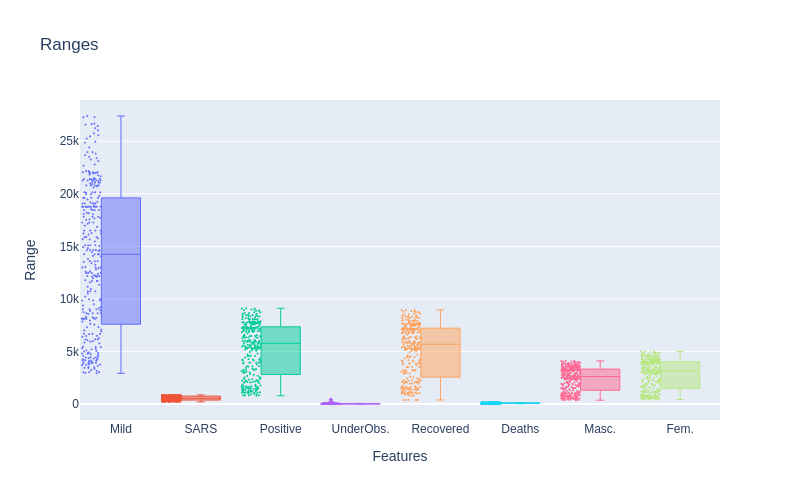

In [3]:
#Plot the ranges of the features 

x = [column for column in df]
y = [tuple(df[column]) for column in df]

fig = go.Figure()

for xd,yd in zip(x, y):
    fig.add_trace(
        go.Box(
            y= yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1
        )
    )
fig.update_layout(
    height=500,
    width=800,
    title="Ranges",
    yaxis_title="Range",
    xaxis_title="Features",
    showlegend=False
)
fig.show() 

In [4]:
#Print a 5 number summary and the interquartile range for each feature

for column in df:
    v = df[column]
    mi = v.min()
    ma = v.max()
    md = v.median()
    q1, q3 = np.percentile(v, [25,75])
    iqr = q3-q1
    print(
        column,"  ( Min:"+str(mi)+" | Q1:"+str(q1)+" | Med:"+str(md)+
        " | Q3:"+str(q3)+" | Max:"+str(ma)+" )  iqr:"+str(iqr)
    )
    print("-"*84)

Mild   ( Min:2921 | Q1:7614.0 | Med:14244.5 | Q3:19615.0 | Max:27406 )  iqr:12001.0
------------------------------------------------------------------------------------
SARS   ( Min:206 | Q1:377.75 | Med:543.0 | Q3:755.0 | Max:867 )  iqr:377.25
------------------------------------------------------------------------------------
Positive   ( Min:791 | Q1:2830.75 | Med:5779.0 | Q3:7345.0 | Max:9110 )  iqr:4514.25
------------------------------------------------------------------------------------
UnderObs.   ( Min:2 | Q1:9.0 | Med:17.0 | Q3:29.0 | Max:496 )  iqr:20.0
------------------------------------------------------------------------------------
Recovered   ( Min:382 | Q1:2579.0 | Med:5690.0 | Q3:7218.0 | Max:8956 )  iqr:4639.0
------------------------------------------------------------------------------------
Deaths   ( Min:23 | Q1:47.75 | Med:80.0 | Q3:117.0 | Max:148 )  iqr:69.25
------------------------------------------------------------------------------------
Masc.   ( Min:3

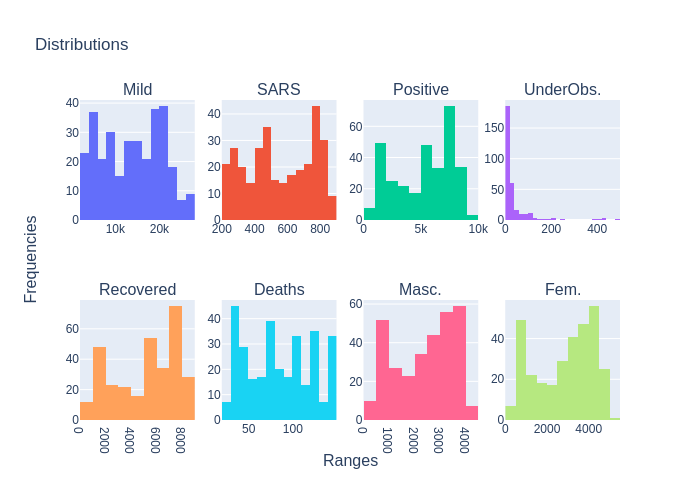

In [5]:
#Plot the distributions of the features

fig = make_subplots(
    rows=2,
    cols=4,
    y_title="Frequencies",
    x_title="Ranges",
    subplot_titles=([str(column) for column in df])
)
values = [tuple(df[column]) for column in df]
r = 1
c = 1

for column,v in zip(df, values):
    if c < 5:
        fig.add_trace(go.Histogram(x=v, name=column),row=r, col=c)
        c += 1
    else:
        c = 1
        r = 2
        fig.add_trace(go.Histogram(x=v, name=column),row=r, col=c)
        c += 1
    
fig.update_layout(
    title="Distributions",
    showlegend=False
)
                  
fig.show()

In [6]:
#Calculate proportions between the features

df["Mild%"] = df.Mild/(df.Mild+df.SARS)
df["SARS%"] = df.SARS/(df.Mild+df.SARS)
df["Positive%"] = df.Positive/(df.Mild+df.SARS)
df["Negative%"] = ((df.Mild+df.SARS)-df.Positive)/(df.Mild+df.SARS)
df["UnderObs%"] = df["UnderObs."]/df.Positive
df["Recovered%"] = df.Recovered/df.Positive
df["Deaths%"] = df.Deaths/df.Positive
df["Masc%"] = df["Masc."]/df.Positive
df["Fem%"] = df["Fem."]/df.Positive

In [7]:
#Create a percentages data frame

percent_df = df.iloc[:,8:]

In [8]:
#Calculate the mean of the percentages for each feature

dic = {}
for column in percent_df:
    v = df[column].mean()
    dic.update({column:v})
    print((column[:-1])+": {0:.1%}".format(v))

Mild: 95.8%
SARS: 4.2%
Positive: 35.8%
Negative: 64.2%
UnderObs: 2.4%
Recovered: 95.9%
Deaths: 1.8%
Masc: 46.0%
Fem: 54.0%


In [9]:
#Define a scheme to plot a comparison

#Notifications
nk = [i[:-1] for i in dic.keys()][:2]
nv = [i for i in dic.values()][:2]
n = ["{0:.1%}".format(i) for i in nv]

#Exams
ek = [i[:-1] for i in dic.keys()][2:4]
ev = [i for i in dic.values()][2:4]
e = ["{0:.1%}".format(i) for i in ev]

#Resolutions
rk = [i[:-1] for i in dic.keys()][4:7]
rv = [i for i in dic.values()][4:7]
r = ["{0:.1%}".format(i) for i in rv]

#Genders
gk = [i[:-1] for i in dic.keys()][-2:]
gv = [i for i in dic.values()][-2:]
g = ["{0:.1%}".format(i) for i in gv]

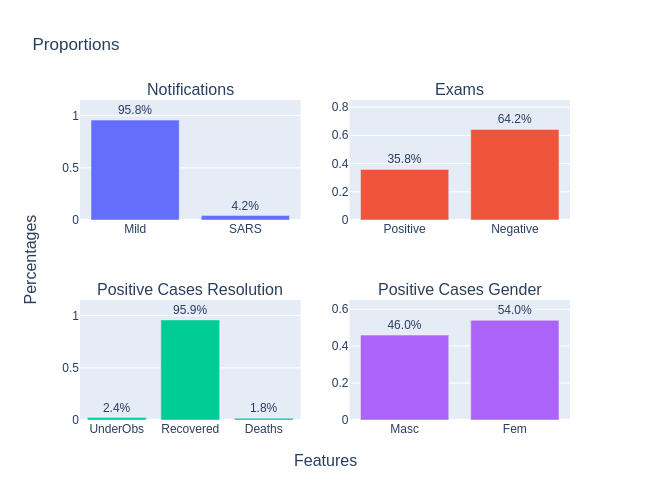

In [10]:
#Plot the proportions between the features

fig = make_subplots(
    rows=2, 
    cols=2,
    y_title="Percentages",
    x_title="Features",
    subplot_titles=(
        "Notifications", 
        "Exams", 
        "Positive Cases Resolution", 
        "Positive Cases Gender"
    )
)
fig.add_trace(go.Bar(x=nk,y=nv,name="Symptoms",text=n,textposition='outside'),row=1,col=1)
fig.add_trace(go.Bar(x=ek, y=ev,name="Results",text=e,textposition='outside'), row=1, col=2)
fig.add_trace(go.Bar(x=rk,y=rv,name="Resol.type",text=r,textposition='outside'), row=2, col=1)
fig.add_trace(go.Bar(x=gk, y=gv,name="Gend.type",text=g,textposition='outside'), row=2, col=2)

fig.update_yaxes(range=[0,1.15],row=1,col=1)
fig.update_yaxes(range=[0,0.85],row=1,col=2)
fig.update_yaxes(range=[0,1.15],row=2,col=1)
fig.update_yaxes(range=[0,0.65],row=2,col=2)

fig.update_layout(
    width=650,
   # height=500,
    title="Proportions",
    showlegend=False
)
fig.show()

In [11]:
#Calculate differences and 7-day averages  

df3 = df[["Positive","Recovered"]].diff(periods=1)
df4 = df3.rolling(window=7).mean().round()

In [12]:
#Impute values for missing days and re-calculate differences and 7-day averages

df5 = df.asfreq("D")
df6 = df5[["Positive","Recovered"]].resample('D').mean().interpolate().astype(int)
df7 = df6.diff(periods=1)
df8 = df7.rolling(window=7).mean().round()

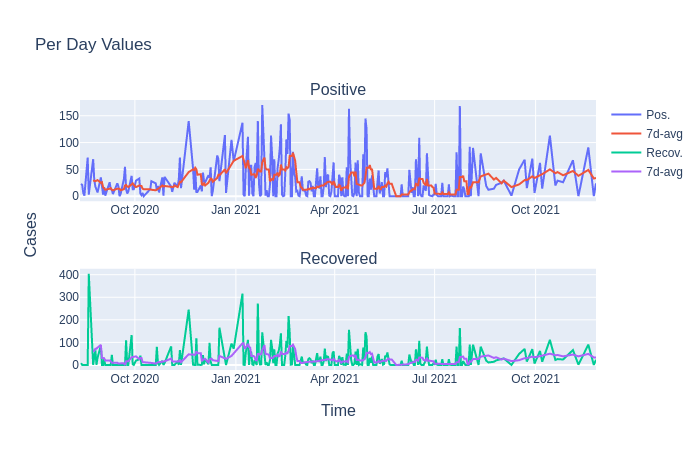

In [13]:
#Plot the differences and 7-day averages

fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=("Positive","Recovered"),
    y_title="Cases",
    x_title="Time"
)
fig.add_trace(go.Scatter(x=df3.index,y=df3.Positive,name="Pos."),row=1,col=1)
fig.add_trace(go.Scatter(x=df4.index,y=df4.Positive,name="7d-avg"),row=1,col=1)
fig.add_trace(go.Scatter(x=df3.index,y=df3.Recovered,name="Recov."),row=2,col=1)
fig.add_trace(go.Scatter(x=df4.index,y=df4.Recovered,name="7d-avg"),row=2,col=1)

fig.update_layout(
    height=450,
    title="Per Day Values")

fig.show()

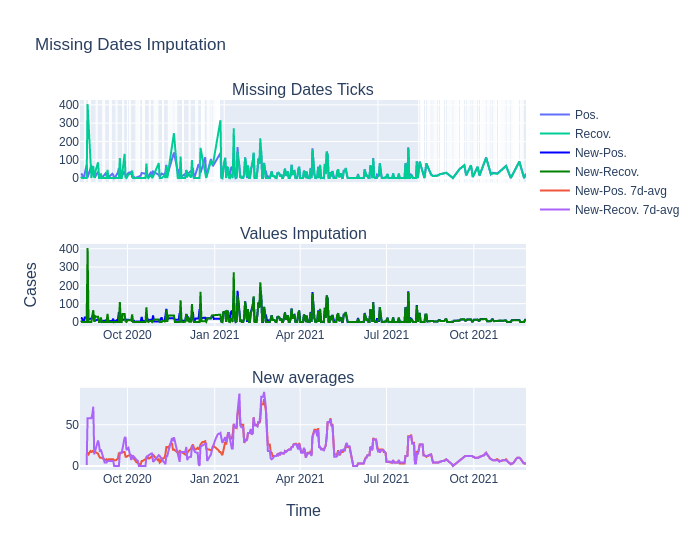

In [14]:
#Plot the imputed differences and 7-day averages

fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        "Missing Dates Ticks",
        "Values Imputation",
        "New averages"
    ),
    y_title="Cases",
    x_title="Time"
)
fig.add_trace(go.Scatter(x=df3.index,y=df3.Positive,name="Pos.",line_color="#636EFA"),row=1,col=1)
fig.add_trace(go.Scatter(x=df3.index,y=df3.Recovered,name="Recov.",line_color="#00cc96"),row=1,col=1)
fig.add_trace(go.Scatter(x=df7.index,y=df7.Positive,name="New-Pos.",line_color="blue"),row=2,col=1)
fig.add_trace(go.Scatter(x=df7.index,y=df7.Recovered,name="New-Recov.",line_color="green"),row=2,col=1)
fig.add_trace(go.Scatter(x=df8.index,y=df8.Positive,name="New-Pos. 7d-avg ",line_color="#EF553B"),row=3,col=1)
fig.add_trace(go.Scatter(x=df8.index,y=df8.Recovered,name="New-Recov. 7d-avg ",line_color="#AB63FA"),row=3,col=1)

fig.update_xaxes(
        tickmode='array',
        showticklabels=False,
        tickvals=df5[df5["Positive"].isnull()].index,
        row=1,
        col=1
)
fig.update_layout(
    height=550,
    title="Missing Dates Imputation"
)
fig.show()

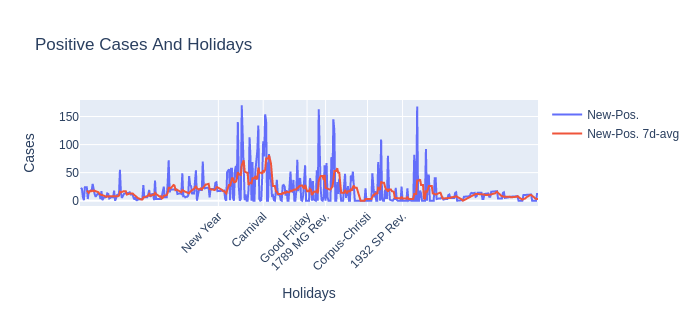

In [15]:
#Plot a comparison between holidays and positive cases

fig = go.Figure()

fig.add_trace(go.Scatter(x=df7.index,y=df7.Positive,name="New-Pos."))
fig.add_trace(go.Scatter(x=df8.index,y=df8.Positive,name="New-Pos. 7d-avg "))

fig.update_xaxes(
        tickmode='array',
        tickvals=['2021-01-01','2021-02-16','2021-04-02','2021-04-21','2021-06-03','2021-07-09'],
        ticktext=["New Year","Carnival","Good Friday","1789 MG Rev.","Corpus-Christi","1932 SP Rev."],
        tickangle=-45
)
fig.update_layout(
    height=310,
    title="Positive Cases And Holidays",
    yaxis_title="Cases",
    xaxis_title="Holidays"
)
fig.show()

Apparently there are large increases in positive cases a few days after commemorative dates. A predictable scenario for a city known as a tourist attraction.

In [16]:
#Create a data frame with differences and 7-day averages

df3 = df.iloc[:,:8].copy()
df4 = df3.diff(periods=1)
df5 = df4.rolling(window=7).mean().round()
df4 = df4.rename(columns={i:i+"_s" for i in df4.columns})
df5 = df5.rename(columns={i:i+"_m" for i in df5.columns})
raw = df3.join(df4).join(df5)

In [17]:
#Create a data frame with empty missing dates 

fre = raw.asfreq("D")

In [18]:
#Create a data frame with missing dates imputation, differences, and 7-day averages

df6 = df3.asfreq("D")
df7 = df6.resample("D").mean().interpolate().astype(int)
df8 = df7.diff(periods=1)
df9 = df8.rolling(window=7).mean().round()
df8 = df8.rename(columns={i:i+"_s" for i in df8.columns})
df9 = df9.rename(columns={i:i+"_m" for i in df9.columns})
imp = df7.join(df8).join(df9)

In [19]:
#Take the dates back to the data frames

raw = raw.reset_index(drop=False)
fre = fre.reset_index(drop=False)
imp = imp.reset_index(drop=False)

In [20]:
#Change the columns names formats

raw = raw.rename(columns={i:i.lower().replace(".","") for i in raw.columns})
fre = fre.rename(columns={i:i.lower().replace(".","") for i in fre.columns})
imp = imp.rename(columns={i:i.lower().replace(".","") for i in imp.columns})

In [21]:
#Display information about the data frame

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     312 non-null    datetime64[ns]
 1   mild         312 non-null    int64         
 2   sars         312 non-null    int64         
 3   positive     312 non-null    int64         
 4   underobs     312 non-null    int64         
 5   recovered    312 non-null    int64         
 6   deaths       312 non-null    int64         
 7   masc         312 non-null    int64         
 8   fem          312 non-null    int64         
 9   mild_s       311 non-null    float64       
 10  sars_s       311 non-null    float64       
 11  positive_s   311 non-null    float64       
 12  underobs_s   311 non-null    float64       
 13  recovered_s  311 non-null    float64       
 14  deaths_s     311 non-null    float64       
 15  masc_s       311 non-null    float64       
 16  fem_s   

In [22]:
#Display information about the data frame

fre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     471 non-null    datetime64[ns]
 1   mild         312 non-null    float64       
 2   sars         312 non-null    float64       
 3   positive     312 non-null    float64       
 4   underobs     312 non-null    float64       
 5   recovered    312 non-null    float64       
 6   deaths       312 non-null    float64       
 7   masc         312 non-null    float64       
 8   fem          312 non-null    float64       
 9   mild_s       311 non-null    float64       
 10  sars_s       311 non-null    float64       
 11  positive_s   311 non-null    float64       
 12  underobs_s   311 non-null    float64       
 13  recovered_s  311 non-null    float64       
 14  deaths_s     311 non-null    float64       
 15  masc_s       311 non-null    float64       
 16  fem_s   

In [23]:
#Display information about the data frame

imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     471 non-null    datetime64[ns]
 1   mild         471 non-null    int64         
 2   sars         471 non-null    int64         
 3   positive     471 non-null    int64         
 4   underobs     471 non-null    int64         
 5   recovered    471 non-null    int64         
 6   deaths       471 non-null    int64         
 7   masc         471 non-null    int64         
 8   fem          471 non-null    int64         
 9   mild_s       470 non-null    float64       
 10  sars_s       470 non-null    float64       
 11  positive_s   470 non-null    float64       
 12  underobs_s   470 non-null    float64       
 13  recovered_s  470 non-null    float64       
 14  deaths_s     470 non-null    float64       
 15  masc_s       470 non-null    float64       
 16  fem_s   

In [24]:
#Save the data frames to .csv files

#raw.to_csv("./Csv_Files/webapp_raw.csv", index=False)
#fre.to_csv("./Csv_Files/webapp_as_freq.csv", index=False)
#imp.to_csv("./Csv_Files/webapp_imputed.csv", index=False)